In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Load dataset
data = pd.read_csv('customer_churn_data.csv')

# One-hot encoding for categorical columns
encoder = OneHotEncoder(sparse=False)
categorical_columns = ['ContractType', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                       'PaymentMethod']
encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_columns]))

# Use get_feature_names for older versions of scikit-learn
encoded_data.columns = encoder.get_feature_names(categorical_columns)

# Drop original categorical columns and concatenate encoded columns
data.drop(categorical_columns, axis=1, inplace=True)
data = pd.concat([data, encoded_data], axis=1)

# Convert 'Churn' column to binary
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Define features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Feature Importances
feature_importances = pd.DataFrame(rf_model.feature_importances_, 
                                   index = X_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Predict new customer data (assuming you have 'new_customer_data.csv')
# new_customer_data = pd.read_csv('customer_churn_data.csv')
# Process new_customer_data like the training data before prediction
# new_customer_predictions = rf_model.predict(data)


[[255   0]
 [ 44   1]]
Accuracy: 0.8533333333333334
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       255
           1       1.00      0.02      0.04        45

    accuracy                           0.85       300
   macro avg       0.93      0.51      0.48       300
weighted avg       0.87      0.85      0.79       300



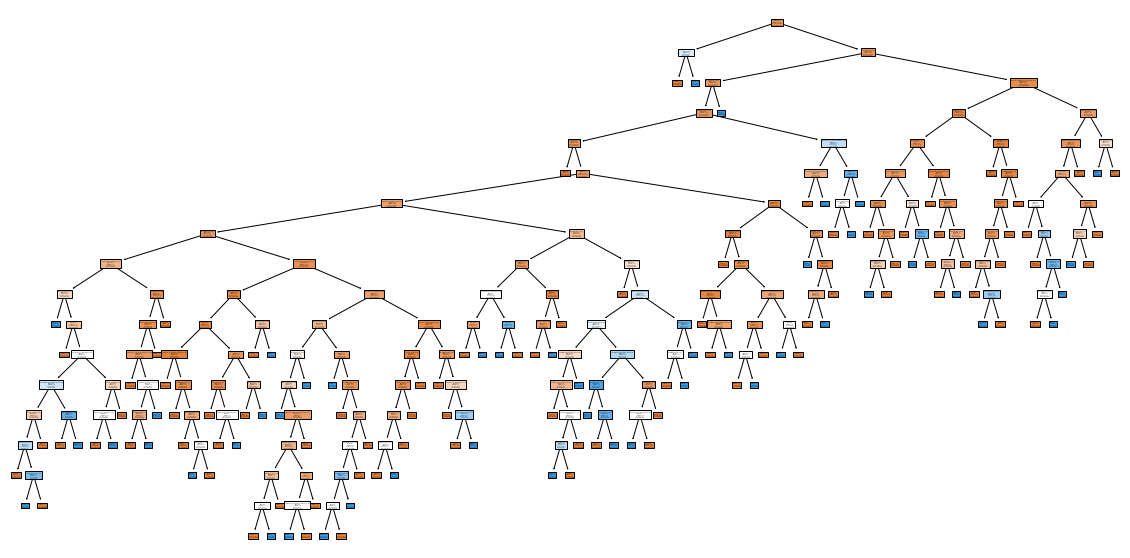

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Choose a tree from your RandomForest model
chosen_tree = rf_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(chosen_tree, 
          feature_names=X_train.columns,  
          class_names=['No Churn', 'Churn'],
          filled=True)
plt.show()